Question-1

In [1]:
#importinng necessery libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, auc, precision_recall_curve, roc_curve, plot_confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,classification_report
from numpy import mean, std
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline

import warnings
warnings.filterwarnings('ignore')

### Data Reading & Cleaning

In [2]:
#Reading the csv file and storing it in a dataframe called gen
gen = pd.read_csv('C:/Users/Kumar/OneDrive/Documents/Machine_Learning_Shahram/Classification Problem/gender_classification_v7.csv')
gen

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female
...,...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0,Female
4997,1,11.9,5.4,0,0,0,0,Female
4998,1,12.9,5.7,0,0,0,0,Female
4999,1,13.2,6.2,0,0,0,0,Female


In [3]:
gen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 312.7+ KB


we can observe with the above result that most of the features are in categorical state, only 2 columns i.e forehead_width_cm and forehead_height_cm are numerical.

In [4]:
#checking whether column has null or not
gen.isnull().sum()

long_hair                    0
forehead_width_cm            0
forehead_height_cm           0
nose_wide                    0
nose_long                    0
lips_thin                    0
distance_nose_to_lip_long    0
gender                       0
dtype: int64

In [5]:
gen['gender'].unique()

array(['Male', 'Female'], dtype=object)

In [6]:
#check the number of unique values in each column
for i in gen.columns:
    print(f'The column "{i}" has {len(gen[i].value_counts())} unique values.')

The column "long_hair" has 2 unique values.
The column "forehead_width_cm" has 42 unique values.
The column "forehead_height_cm" has 21 unique values.
The column "nose_wide" has 2 unique values.
The column "nose_long" has 2 unique values.
The column "lips_thin" has 2 unique values.
The column "distance_nose_to_lip_long" has 2 unique values.
The column "gender" has 2 unique values.


In [7]:
#label Encoding the 'gender' variable: 1 for 'Male & 0 for 'Female'
from sklearn.preprocessing import LabelEncoder
gen['gender'] = LabelEncoder().fit_transform(gen['gender'])
gen

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,1
1,0,14.0,5.4,0,0,1,0,0
2,0,11.8,6.3,1,1,1,1,1
3,0,14.4,6.1,0,1,1,1,1
4,1,13.5,5.9,0,0,0,0,0
...,...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0,0
4997,1,11.9,5.4,0,0,0,0,0
4998,1,12.9,5.7,0,0,0,0,0
4999,1,13.2,6.2,0,0,0,0,0


### Exploratory Data Analysis

0    2501
1    2500
Name: gender, dtype: int64


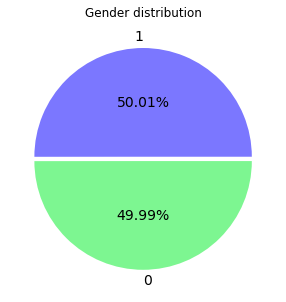

In [8]:
#Counting the number of males and females in the dataset.
print(gen['gender'].value_counts())
pie, ax = plt.subplots(figsize=[5,5])
labels = [1, 0]
colors = ['#7b77ff', '#7df691']
plt.pie(x = gen['gender'].value_counts(), autopct='%.2f%%', explode=[0.02]*2, labels=labels, pctdistance=0.5, textprops={'fontsize': 14}, colors = colors)
plt.title('Gender distribution')
plt.show()

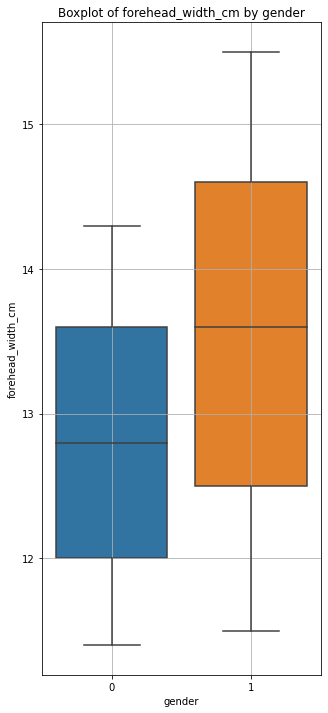

In [9]:
#boxplot w.r.t forehead_width
plt.figure(figsize=(5,12))
sns.boxplot(x='gender', y="forehead_width_cm", data=gen)
plt.title('Boxplot of forehead_width_cm by gender')
plt.grid()
plt.show()

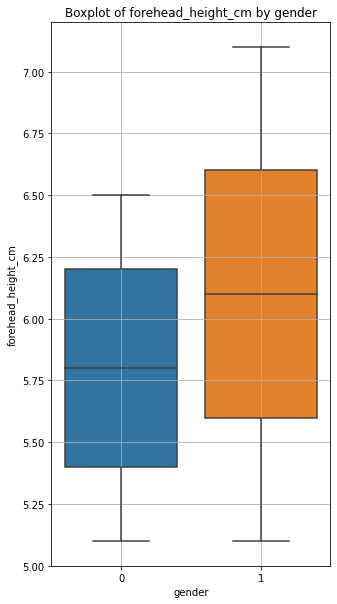

In [10]:
#boxplot w.r.t forehead_height
plt.figure(figsize=(5,10))
sns.boxplot(x='gender', y="forehead_height_cm", data=gen)
plt.title('Boxplot of forehead_height_cm by gender')
plt.grid()
plt.show()

<AxesSubplot:xlabel='gender', ylabel='count'>

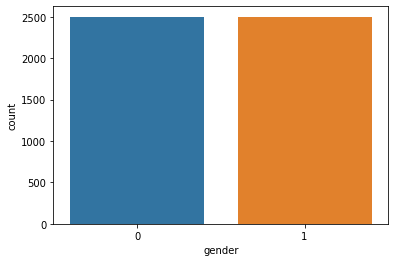

In [11]:
#countplot for gender where 0 = Female and 1 = Male
sns.countplot(x=gen.gender)

<AxesSubplot:xlabel='gender', ylabel='count'>

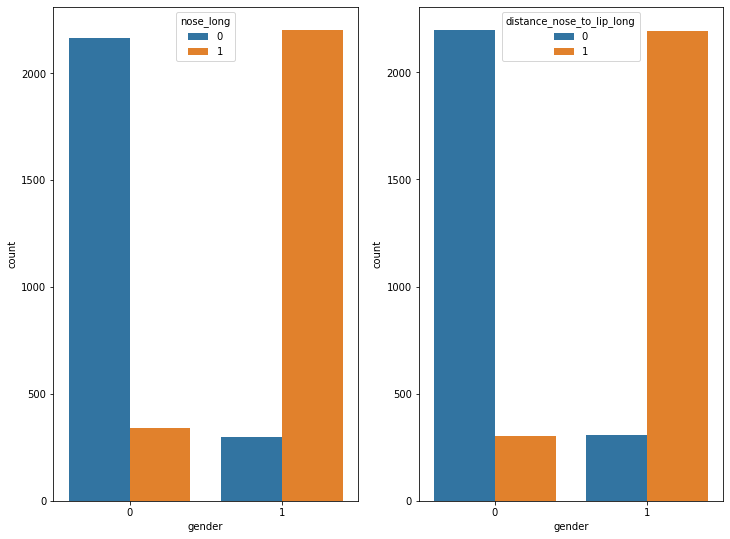

In [12]:
#countplot w.r.t nose_long and distance_nose_to_lip_long
plt.figure(figsize=(12,20))
plt.subplot(2,2,1)
sns.countplot(x='gender',hue='nose_long',data=gen)
plt.subplot(2,2,2)
sns.countplot(x='gender',hue='distance_nose_to_lip_long',data=gen)

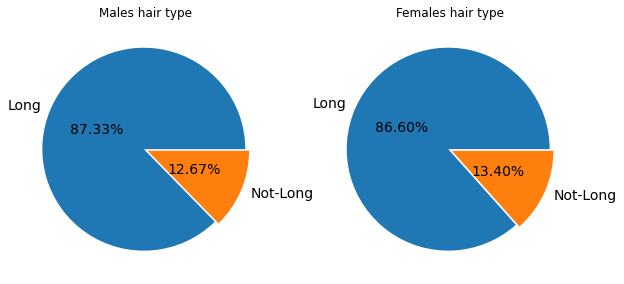

In [14]:
#pie chart w.r.t Hair
males = gen[gen['gender'] == 0]
females = gen[gen['gender'] == 1]
pie, ax = plt.subplots(1,2, figsize=[10,5])
labels = ['Long', 'Not-Long']
ax[0].pie(x = males['long_hair'].value_counts(), autopct='%.2f%%', explode=[0.02]*2, labels=labels, pctdistance=0.5, textprops={'fontsize': 14})
ax[0].set_title('Males hair type')
ax[1].pie(x = females['long_hair'].value_counts(), autopct='%.2f%%', explode=[0.02]*2, labels=labels, pctdistance=0.5, textprops={'fontsize': 14})
ax[1].set_title('Females hair type')
plt.show()

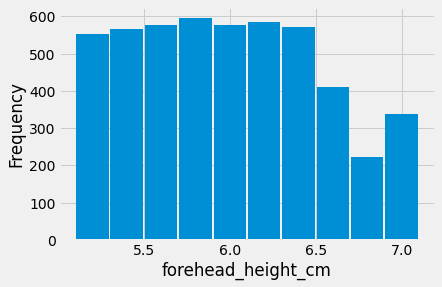

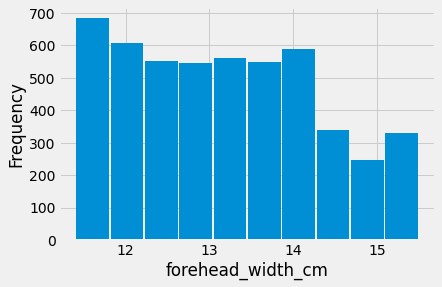

In [15]:
dig = ['forehead_height_cm','forehead_width_cm']
for col in dig:
    plt.style.use('fivethirtyeight')
    gen[col].plot(kind='hist', rwidth=0.95)
    plt.xlabel(col)
    plt.show()
    print('\n')

### Data Preparation

In [16]:
#separating feature columns and target column
X = gen.iloc[:, :-1].values
y = gen.iloc[:, -1].values

In [17]:
#spliting the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.25)

In [18]:
#print the result of train and test data
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(3750, 7) (3750,)
(1251, 7) (1251,)


### Modelling

Initializing classifiers method and hyperparameters

In [19]:
pipe = Pipeline([('scaler', StandardScaler()), ('clf', SVC())])

param = {
    'scaler__with_mean':[True, False],
    'scaler__with_std':[True, False],
    'clf__C':[1,3,5,7,10],
    'clf__degree':[1,2,3],
    'clf__gamma':['scale','auto'],
    'clf__kernel':['rbf','linear']
}

random = RandomizedSearchCV(pipe, param, cv=5, scoring='f1_macro', verbose=1)
random.fit(X_train, y_train)
y_pred = random.predict(X_test)

print(random.best_params_)
print(random.best_score_)
print(f1_score(y_test, y_pred))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'scaler__with_std': False, 'scaler__with_mean': False, 'clf__kernel': 'rbf', 'clf__gamma': 'auto', 'clf__degree': 2, 'clf__C': 3}
0.9735979359168134
0.9677419354838709


## SVC Classifier

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.25)

scaler = StandardScaler(with_mean=True, with_std=False).fit(X_train)
x_train_scaled = scaler.transform(X_train)
x_test_scaled = scaler.transform(X_test)

model_svc = SVC(C=3, degree=1, gamma='auto').fit(x_train_scaled, y_train)
y_pred = model_svc.predict(x_test_scaled)

print('accuracy score svc model = {}'.format(accuracy_score(y_test, y_pred).round(3)))
print('precision score svc model = {}'.format(precision_score(y_test, y_pred).round(3)))
print('recall score svc model = {}'.format(recall_score(y_test, y_pred).round(3)))
print('f1 macro score svc model = {}'.format(f1_score(y_test, y_pred).round(3)))

accuracy score svc model = 0.969
precision score svc model = 0.975
recall score svc model = 0.961
f1 macro score svc model = 0.968


## Logistic Regression

In [21]:
model_lr = LogisticRegression(C=3, solver='saga').fit(x_train_scaled, y_train)
y_pred = model_lr.predict(x_test_scaled)

print('accuracy score lr model = {}'.format(accuracy_score(y_test, y_pred).round(3)))
print('precision score lr model = {}'.format(precision_score(y_test, y_pred).round(3)))
print('recall score lr model = {}'.format(recall_score(y_test, y_pred).round(3)))
print('f1 macro score lr model = {}'.format(f1_score(y_test, y_pred).round(3)))

accuracy score lr model = 0.967
precision score lr model = 0.967
recall score lr model = 0.966
f1 macro score lr model = 0.966


## Random Forest Classifier

In [22]:
model_random = RandomForestClassifier(max_depth=2, random_state=0).fit(x_train_scaled, y_train)
y_pred = model_random.predict(x_test_scaled)

print('accuracy score random model = {}'.format(accuracy_score(y_test, y_pred).round(3)))
print('precision score random model = {}'.format(precision_score(y_test, y_pred).round(3)))
print('recall score random model = {}'.format(recall_score(y_test, y_pred).round(3)))
print('f1 macro score random model = {}'.format(f1_score(y_test, y_pred).round(3)))

accuracy score random model = 0.963
precision score random model = 0.961
recall score random model = 0.964
f1 macro score random model = 0.962


## Decision Tree Classifier

In [23]:
model_dc = DecisionTreeClassifier(random_state=0).fit(x_train_scaled, y_train)
y_pred = model_dc.predict(x_test_scaled)

print('accuracy score dc model = {}'.format(accuracy_score(y_test, y_pred).round(3)))
print('precision score dc model = {}'.format(precision_score(y_test, y_pred).round(3)))
print('recall score dc model = {}'.format(recall_score(y_test, y_pred).round(3)))
print('f1 macro score dc model = {}'.format(f1_score(y_test, y_pred).round(3)))

accuracy score dc model = 0.963
precision score dc model = 0.967
recall score dc model = 0.957
f1 macro score dc model = 0.962


## Standard Scaling with SVC

In [24]:
X_scaled = StandardScaler(with_mean=True, with_std=False).fit_transform(gen.iloc[:, :-1].values)

print('cv 5x score = {}'.format(cross_val_score(model_svc, X_scaled, y, scoring='f1_macro', cv=5)))
print('mean = {}'.format(cross_val_score(model_svc, X_scaled, y, scoring='f1_macro', cv=5).mean()))

cv 5x score = [0.96003801 0.96799539 0.98399974 0.9739949  0.9809977 ]
mean = 0.9734051489735371


## Standard Scaling with Logistic Regression

In [25]:
X_scaled = StandardScaler(with_mean=True, with_std=False).fit_transform(gen.iloc[:, :-1].values)

print('cv 5x score = {}'.format(cross_val_score(model_lr, X_scaled, y, scoring='f1_macro', cv=5)))
print('mean = {}'.format(cross_val_score(model_lr, X_scaled, y, scoring='f1_macro', cv=5).mean()))

cv 5x score = [0.96103834 0.96099965 0.97499977 0.96699917 0.97599962]
mean = 0.9680073107730671


## Standard Scaling with Random Forest Classifier

In [26]:
X_scaled = StandardScaler(with_mean=True, with_std=False).fit_transform(gen.iloc[:, :-1].values)

print('cv 5x score = {}'.format(cross_val_score(model_random, X_scaled, y, scoring='f1_macro', cv=5)))
print('mean = {}'.format(cross_val_score(model_random, X_scaled, y, scoring='f1_macro', cv=5).mean()))

cv 5x score = [0.96103881 0.96999808 0.97699979 0.97199821 0.97999608]
mean = 0.9720061930994979


## Standard Scaling with Decision Tree

In [27]:
X_scaled = StandardScaler(with_mean=True, with_std=False).fit_transform(gen.iloc[:, :-1].values)

print('cv 5x score = {}'.format(cross_val_score(model_dc, X_scaled, y, scoring='f1_macro', cv=5)))
print('mean = {}'.format(cross_val_score(model_dc, X_scaled, y, scoring='f1_macro', cv=5).mean()))

cv 5x score = [0.95104817 0.96299996 0.97299932 0.96599986 0.96899922]
mean = 0.9644093092693883


## Monte Carlo using SVC

In [28]:
acc = [] ### Blank vector
for i in range(1000):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.25)
    model_svc=SVC() # model
    svc = model_svc.fit(X_train,y_train) # fit the model
    YPred = svc.predict(X_test) # predict
    a = accuracy_score(y_test,YPred) # compute accuracy
    acc.append(a) # append accuracy
print("Accuracy using 1000 MC run:", np.mean(acc))  # average of accuracy to stablize the result

Accuracy using 1000 MC run: 0.9656274980015987


## Monte Carlo using Logistic Regression

In [29]:
acc = [] ### Blank vector
for i in range(1000):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.25)
    model_lr=LogisticRegression() # model
    lr = model_lr.fit(X_train,y_train) # fit the model
    YPred = lr.predict(X_test) # predict
    a = accuracy_score(y_test,YPred) # compute accuracy
    acc.append(a) # append accuracy
print("Accuracy using 1000 MC run:", np.mean(acc))  # average of accuracy to stablize the result

Accuracy using 1000 MC run: 0.9672262190247803


## Monte Carlo using Random Forest Classifier

In [30]:
acc = [] ### Blank vector
for i in range(1000):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.25)
    model_random=RandomForestClassifier() # model
    rf = model_random.fit(X_train,y_train) # fit the model
    YPred = rf.predict(X_test) # predict
    a = accuracy_score(y_test,YPred) # compute accuracy
    acc.append(a) # append accuracy
print("Accuracy using 1000 MC run:", np.mean(acc))  # average of accuracy to stablize the result

Accuracy using 1000 MC run: 0.9651382893685052


## Monte Carlo using Decision Tree Classifier

In [31]:
acc = [] ### Blank vector
for i in range(1000):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.25)
    model_dc=DecisionTreeClassifier() # model
    dc = model_dc.fit(X_train,y_train) # fit the model
    YPred = dc.predict(X_test) # predict
    a = accuracy_score(y_test,YPred) # compute accuracy
    acc.append(a) # append accuracy
print("Accuracy using 1000 MC run:", np.mean(acc))  # average of accuracy to stablize the result

Accuracy using 1000 MC run: 0.961519584332534


In [32]:
precision, recall, threshold1 = precision_recall_curve(y_test, y_pred)
fpr, tpr, threshold2 = roc_curve(y_test, y_pred)

## precision recall and ROC curve for the models respectively

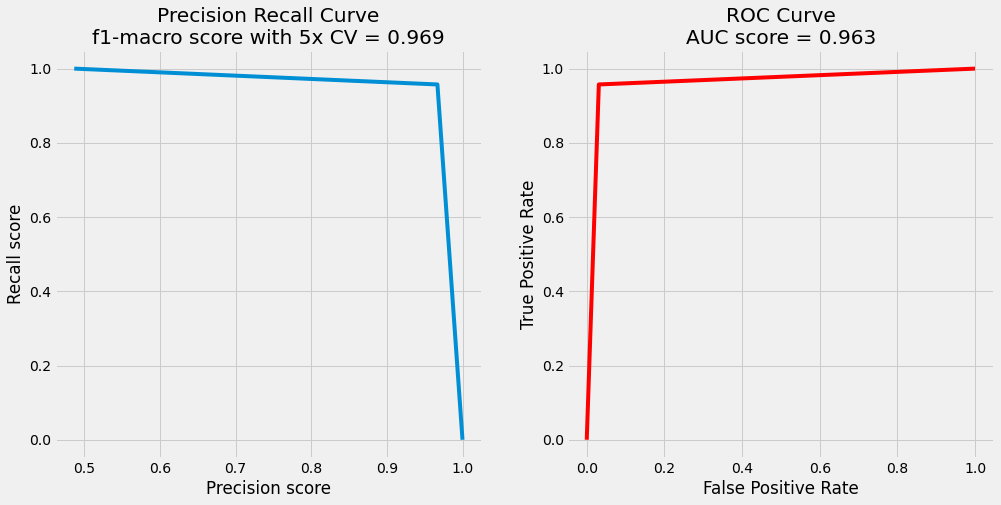

In [40]:
#SVC
calculate = np.argmin(np.abs(threshold1))
precision_calculate = precision[calculate]
recall_calculate = recall[calculate]

fig,ax = plt.subplots(1,2,figsize=(15,7))
ax[0].plot(precision, recall)
ax[0].set_xlabel('Precision score')
ax[0].set_ylabel('Recall score')
ax[0].set_title('Precision Recall Curve\nf1-macro score with 5x CV = {}'.format(cross_val_score(model_svc, X, y, scoring='f1_macro', cv=5).mean().round(3)))

ax[1].plot(fpr, tpr, c='r')
ax[1].set_xlabel('False Positive Rate')
ax[1].set_ylabel('True Positive Rate')
ax[1].set_title('ROC Curve\nAUC score = {}'.format(auc(fpr,tpr).round(3)))

plt.show()

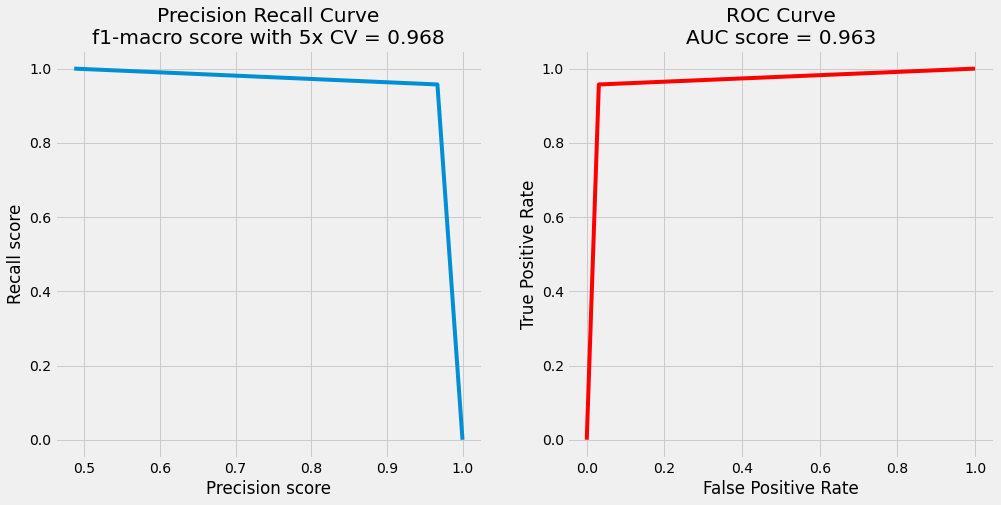

In [35]:
#Logistic Regression
calculate = np.argmin(np.abs(threshold1))
precision_calculate = precision[calculate]
recall_calculate = recall[calculate]

fig,ax = plt.subplots(1,2,figsize=(15,7))
ax[0].plot(precision, recall)
ax[0].set_xlabel('Precision score')
ax[0].set_ylabel('Recall score')
ax[0].set_title('Precision Recall Curve\nf1-macro score with 5x CV = {}'
.format(cross_val_score(model_lr, X, y, scoring='f1_macro', cv=5).mean().round(3)))

ax[1].plot(fpr, tpr, c='r')
ax[1].set_xlabel('False Positive Rate')
ax[1].set_ylabel('True Positive Rate')
ax[1].set_title('ROC Curve\nAUC score = {}'.format(auc(fpr,tpr).round(3)))

plt.show()

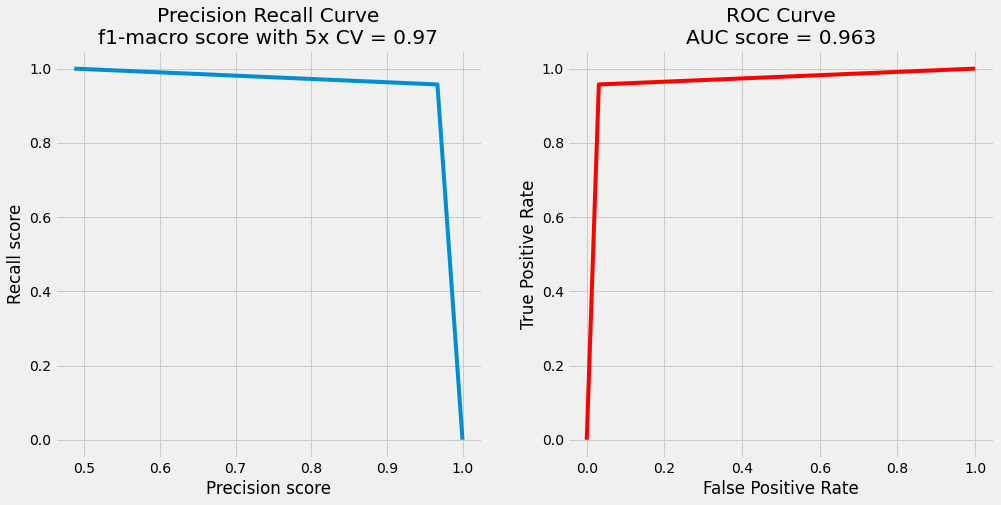

In [41]:
#Random Forest
calculate = np.argmin(np.abs(threshold1))
precision_calculate = precision[calculate]
recall_calculate = recall[calculate]

fig,ax = plt.subplots(1,2,figsize=(15,7))
ax[0].plot(precision, recall)
ax[0].set_xlabel('Precision score')
ax[0].set_ylabel('Recall score')
ax[0].set_title('Precision Recall Curve\nf1-macro score with 5x CV = {}'
.format(cross_val_score(model_random, X, y, scoring='f1_macro', cv=5).mean().round(3)))

ax[1].plot(fpr, tpr, c='r')
ax[1].set_xlabel('False Positive Rate')
ax[1].set_ylabel('True Positive Rate')
ax[1].set_title('ROC Curve\nAUC score = {}'.format(auc(fpr,tpr).round(3)))

plt.show()

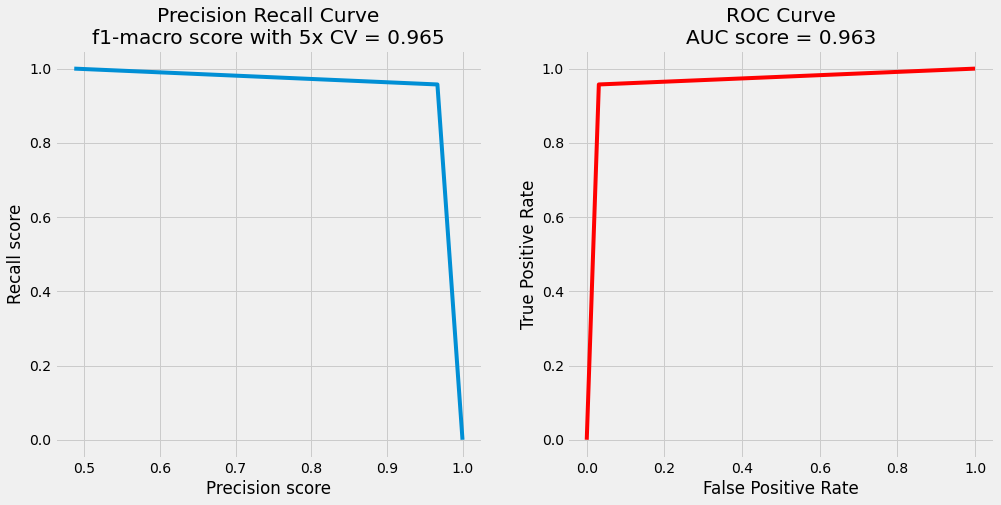

In [42]:
#Decision Tree
calculate = np.argmin(np.abs(threshold1))
precision_calculate = precision[calculate]
recall_calculate = recall[calculate]

fig,ax = plt.subplots(1,2,figsize=(15,7))
ax[0].plot(precision, recall)
ax[0].set_xlabel('Precision score')
ax[0].set_ylabel('Recall score')
ax[0].set_title('Precision Recall Curve\nf1-macro score with 5x CV = {}'
.format(cross_val_score(model_dc, X, y, scoring='f1_macro', cv=5).mean().round(3)))

ax[1].plot(fpr, tpr, c='r')
ax[1].set_xlabel('False Positive Rate')
ax[1].set_ylabel('True Positive Rate')
ax[1].set_title('ROC Curve\nAUC score = {}'.format(auc(fpr,tpr).round(3)))

plt.show()

In [43]:
#performing confusion matix
tsize = [0.2,0.3,0.4,0.5,0.6,0.7]
tsize_acc = {}
for i in tsize:
    acc = []
    for j in range(100):
        X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.25)
        model_lr=LogisticRegression() # create the model
        lr = model_lr.fit(X_train,y_train)  # fit the model to trainset
        YPred = lr.predict(X_test)   # predict the output variable in the testset
        accuracy = accuracy_score(y_test,YPred)
        report = classification_report(YPred, y_test)
        cm = confusion_matrix(y_test, YPred)
    tsize_acc.update({i:accuracy})
print(tsize_acc)
print("Classification report:")
print("Accuracy: ", accuracy)
print(report)
print("Confusion matrix:")
print(cm)

{0.2: 0.9672262190247801, 0.3: 0.9672262190247801, 0.4: 0.9672262190247801, 0.5: 0.9672262190247801, 0.6: 0.9672262190247801, 0.7: 0.9672262190247801}
Classification report:
Accuracy:  0.9672262190247801
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       643
           1       0.97      0.97      0.97       608

    accuracy                           0.97      1251
   macro avg       0.97      0.97      0.97      1251
weighted avg       0.97      0.97      0.97      1251

Confusion matrix:
[[622  20]
 [ 21 588]]


In [52]:
def get_stacking():
# define the base models: level0 models
    level0 = list()
    level0.append(('lr', LogisticRegression()))
    level0.append(('cart', RandomForestClassifier(n_estimators=450, criterion='entropy')))
    level0.append(('svm', SVC(kernel='rbf')))
    level0.append(('bayes', GaussianNB()))
# define meta learner model: level 1
    level1 = LogisticRegression()
    # define the stacking ensemble
    model = StackingClassifier(estimators=level0, final_estimator=level1, cv=10)
    return model

In [53]:
# performing/get the list of models to evaluate
def get_models():
    models = dict()
    models['lr']=LogisticRegression()
    models['bayes'] = GaussianNB()
    models['svc_lr']=SVC(kernel='linear')
    models['svm_polly'] = SVC(kernel='poly')
    models['svm_rbf'] = SVC(kernel='rbf')
    models['svm_sigmoid'] = SVC(kernel='sigmoid')
    models['dt_ent'] = DecisionTreeClassifier(min_samples_split= 4, min_samples_leaf= 2, max_depth= 10, criterion='entropy')
    models['dt_gini'] = DecisionTreeClassifier(min_samples_split= 4, min_samples_leaf= 2, max_depth= 10, criterion='gini')
    models['rf'] = RandomForestClassifier(n_estimators=450, criterion='entropy')
    models['bagg_dt'] = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=450)
    models['bagg_svc'] = BaggingClassifier(base_estimator=SVC(), n_estimators=450)
    models['bagg_nb'] = BaggingClassifier(base_estimator=GaussianNB(), n_estimators=450)
    models['adaboost'] = AdaBoostClassifier(base_estimator=LogisticRegression(), n_estimators=450)
    models['stacking']= get_stacking()
    return models

In [54]:
def evaluate_multi_model(model, X, y):
    mc=10
    acc = [] ### Blank vector
    f = []
    prec = []
    rec = []
#c_report = []  
    for i in range(mc):
        X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.25)# split dataset
        classifier = model.fit(X_train,y_train) # fit the model
        YPred = classifier.predict(X_test) # predict
        a = accuracy_score(y_test,YPred) # compute accuracy
        f1 = f1_score(y_test, YPred, average='weighted')
        precision = precision_score(y_test, YPred, average='weighted')
        recall = recall_score(y_test, YPred, average='weighted')
        report = classification_report(YPred, y_test)
        acc.append(a) # append accuracy
        f.append(f1)
        prec.append(precision)
        rec.append(recall)
#c_report.append(report)      
        return np.mean(acc), classifier, np.mean(recall), np.mean(prec),np.mean(f)

In [55]:
def evaluate_model_cross(model, X, y):
    cv = 10
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv)
    return scores

In [56]:
import pickle
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores, mod, prec, recall,fscore = evaluate_multi_model(model,X,y)#, X, y)
    results.append(scores)
    names.append(name)
    filename = './models/'+name+'.pkl'
    pickle.dump(mod, open(filename, 'wb'))
    print(name,'-- accuracy:', mean(scores), '-- Precision ', mean(prec),'-- Recall', mean(recall),'-- Fscore:', mean(fscore))

lr -- accuracy: 0.9672262190247801 -- Precision  0.9672262190247801 -- Recall 0.9672260309130121 -- Fscore: 0.9672255064806643
bayes -- accuracy: 0.9688249400479616 -- Precision  0.9688249400479616 -- Recall 0.9688248235004532 -- Fscore: 0.9688242622620953
svc_lr -- accuracy: 0.9632294164668266 -- Precision  0.9632294164668266 -- Recall 0.9632372579841201 -- Fscore: 0.9632308740869507
svm_polly -- accuracy: 0.9640287769784173 -- Precision  0.9640287769784173 -- Recall 0.964691141506132 -- Fscore: 0.9640340638184761
svm_rbf -- accuracy: 0.9656274980015987 -- Precision  0.9656274980015987 -- Recall 0.9656272383255712 -- Fscore: 0.9656267506992331
svm_sigmoid -- accuracy: 0.43005595523581136 -- Precision  0.43005595523581136 -- Recall 0.429470257019982 -- Fscore: 0.4296422027532239
dt_ent -- accuracy: 0.964828137490008 -- Precision  0.964828137490008 -- Recall 0.9649322974304887 -- Fscore: 0.9648184622307374
dt_gini -- accuracy: 0.9672262190247801 -- Precision  0.9672262190247801 -- Recal

In [57]:
from numpy import mean, std
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model_cross(model, X, y)
    results.append(scores)
    names.append(name)
    filename = 'implement/'+name+'_cv.pkl'
    pickle.dump(model, open(filename, 'wb'))
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

>lr 0.968 (0.009)
>bayes 0.970 (0.009)
>svc_lr 0.967 (0.009)
>svm_polly 0.965 (0.008)
>svm_rbf 0.970 (0.008)
>svm_sigmoid 0.443 (0.020)
>dt_ent 0.968 (0.007)
>dt_gini 0.969 (0.007)
>rf 0.970 (0.008)
>bagg_dt 0.968 (0.007)
>bagg_svc 0.970 (0.008)
>bagg_nb 0.970 (0.009)
>adaboost 0.968 (0.009)
>stacking 0.970 (0.008)


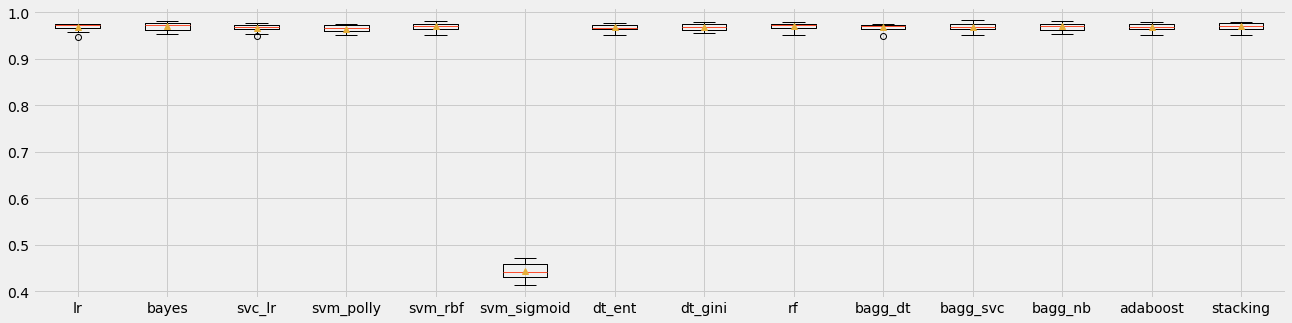

In [58]:
plt.figure(figsize=(20,5))
plt.boxplot(results, labels=names, showmeans=True)
plt.show()